### Title: "DSCI 6601: " Machine Learning Model for Polycystic Overy Syndrome

### Name: Sharmin Akhter

### ID: 201891112

## Introduction

With an increased strain on the healthcare system (especially in the present scenario) , it is often di cult for healthcare services to triage the cases they are presented with an accurate manner. This often results in patients not receiving the care they require, misdiagnosis due to human error and even complications owing to delayed treatment. The use of machine learning models, has recently taken over as a great way to serve as preliminary  lter to allow early diagnosis in the health care sector.

In this project I will review the prediction of Polycystic Overy Syndrome using Machine Learning Model. The goal here is to design a robust Machine Learning Model which will help health service provider to predict PCOS quickly reducing misdiagonsis based on the historical data of the patients.

Polycystic overy syndrome a ects are to women of reproductive age and is currently diagnosed to 4%-20% women worldwide. Exact prevalence  gures regarding PCOS are limited and unclear. The features which could possibly contritube to diagnose PCOS are Patterns of Length Of The Menstrual Cycle,Patterns Of BMI, Patterns Of Irregularity In Mensuration, Number of Follicles, Some Miscellaneous EDA.
Studies have shown that there are 44 physical and clinical parameters to detemine PCOS and infertility
related health issues for women. The source of this data is collected from 10 di erent hositals is Kerala, India.
The data is obtained from kaggle.com and here is the link for full data [full new]
(https://www.kaggle.com/code/jiangqizhu0701/pcos a guide-to practical machine learning/data).


# Import Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Data Encoder

In [ ]:
class ColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    

In [ ]:
![]https://drive.google.com/file/d/1vzAvBiIjlvSq6u5WHHPlGvZd-OAelpDE/view?usp=sharing

/bin/bash: []https://drive.google.com/file/d/1vzAvBiIjlvSq6u5WHHPlGvZd-OAelpDE/view?usp=sharing: No such file or directory


In [ ]:
from google.colab import files
uploaded = files.upload()

df_val= df=pd.read_csv('allData.csv')
print(df_val.head())




Saving allData.csv to allData.csv
  Period Length     Cycle Length    Age    City PCOS  PCOS_from Overweight  \
0      4-5 days  Keeps Variating  18-25  mumbai   No        NaN        NaN   
1      4-5 days       20-28 days  18-25  mumbai   No        NaN         No   
2      4-5 days       29-35 days  18-25  mumbai  Yes       20.0        Yes   
3      4-5 days       29-35 days  18-25  mumbai   No        NaN        NaN   
4      4-5 days       20-28 days  18-25   thane   No        NaN        NaN   

  loss weight gain / weight loss irregular or missed periods  \
0                             No                         Yes   
1                            Yes                          No   
2                            Yes                         Yes   
3                             No                          No   
4                             No                         Yes   

  Difficulty in conceiving  ... Hair growth on Inner thighs Acne or skin tags  \
0           Not Applicable  ...

In [ ]:
catagorical_idx = df.select_dtypes(include=['object','bool']).dtypes
print(catagorical_idx.index)
df_val = ColumnLabelEncoder(columns= ['Period Length', 'Cycle Length', 'Age', 'City', 'PCOS', 'Overweight',
       'loss weight gain / weight loss', 'irregular or missed periods',
       'Difficulty in conceiving', 'Hair growth on Chin',
       'Hair growth  on Cheeks', 'Hair growth Between breasts',
       'Hair growth  on Upper lips ', 'Hair growth in Arms',
       'Hair growth on Inner thighs', 'Acne or skin tags',
       'Hair thinning or hair loss ', 'Dark patches', 'always tired',
       'more Mood Swings', 'canned food often', 'relocated city']).fit_transform(df_val)
print(df_val.head())



Index(['Period Length', 'Cycle Length', 'Age', 'City', 'PCOS', 'Overweight',
       'loss weight gain / weight loss', 'irregular or missed periods',
       'Difficulty in conceiving', 'Hair growth on Chin',
       'Hair growth  on Cheeks', 'Hair growth Between breasts',
       'Hair growth  on Upper lips ', 'Hair growth in Arms',
       'Hair growth on Inner thighs', 'Acne or skin tags',
       'Hair thinning or hair loss ', 'Dark patches', 'always tired',
       'more Mood Swings', 'canned food often', 'relocated city'],
      dtype='object')
   Period Length  Cycle Length  Age  City  PCOS  PCOS_from  Overweight  \
0              1             5    0    19     0        NaN           3   
1              1             1    0    19     0        NaN           1   
2              1             3    0    19     1       20.0           2   
3              1             3    0    19     0        NaN           3   
4              1             1    0    26     0        NaN           3   

   lo

## lets see can we reduce the dimensionality of the data,
## finding out correlation matrix


In [ ]:
corr_matrix=df_val.corrwith(df_val["PCOS"]).abs().sort_values(ascending=False)
#features with correlation more than 0.15
corr_matrix=corr_matrix[corr_matrix>0.2].index
print(corr_matrix)

Index(['PCOS', 'loss weight gain / weight loss', 'irregular or missed periods',
       'Cycle Length', 'always tired', 'Hair growth on Chin', 'PCOS_from',
       'Hair growth  on Upper lips ', 'Overweight', 'more Mood Swings',
       'Difficulty in conceiving'],
      dtype='object')


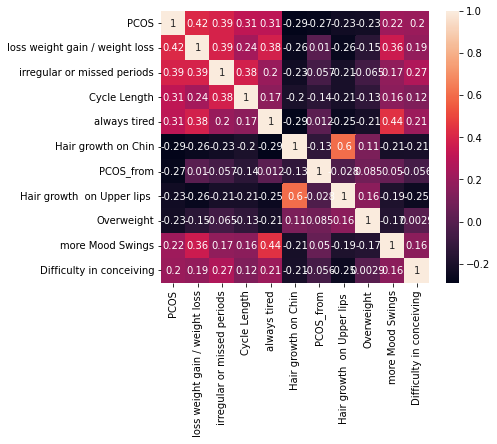

In [ ]:
df_val=df_val[corr_matrix]
plt.figure(figsize=(6,5))
sn.heatmap(df_val.corr(), annot=True)
plt.show()

In [ ]:
df_val = df_val.drop(['PCOS_from'], axis=1)

y=df_val['PCOS']
X=df_val.drop(['PCOS'], axis=1)
Xval_train,Xval_val,yval_train, yval_val=train_test_split(X,y, test_size=0.9, random_state=42)

print(df_val.isnull().sum())
print('Count of NAN ' + str(df_val.isnull().sum().sum()))
print(df_val)

PCOS                              0
loss weight gain / weight loss    0
irregular or missed periods       0
Cycle Length                      0
always tired                      0
Hair growth on Chin               0
Hair growth  on Upper lips        0
Overweight                        0
more Mood Swings                  0
Difficulty in conceiving          0
dtype: int64
Count of NAN 0
     PCOS  loss weight gain / weight loss  irregular or missed periods  \
0       0                               0                            2   
1       0                               1                            0   
2       1                               1                            2   
3       0                               0                            0   
4       0                               0                            2   
..    ...                             ...                          ...   
262     0                               0                            0   
263     0           

## Training and test dataset

In [ ]:
![]https://docs.google.com/spreadsheets/d/1VCP2PM3n5ud4hWzm0AVjzhSQDmGMxw9M/edit?usp=sharing&ouid=106310968755348349021&rtpof=true&sd=true

/bin/bash: []https://docs.google.com/spreadsheets/d/1VCP2PM3n5ud4hWzm0AVjzhSQDmGMxw9M/edit?usp=sharing: No such file or directory


In [ ]:
from google.colab import files
uploaded = files.upload()


df = pd.read_excel("PCOS_data_without_infertility.xlsx",sheet_name="Full_new")
df.head()

Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility.xlsx


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [ ]:
pd.set_option('display.max_columns', None)

# STEP 1: preprocessing and cleaning of the data
# droping unnecassary columns

In [ ]:
df = df.drop(["Unnamed: 44","Sl. No","Patient File No.","Fast food (Y/N)"],axis=1)

# finding out NAN in the dataframe

In [ ]:
print(df.isnull().sum())
print('Count of NAN ' + str(df.isnull().sum().sum()))
print(df)

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

# filling out na with backfill method

In [ ]:
print(str(df['Marraige Status (Yrs)'].isnull().sum().sum()))
df['Marraige Status (Yrs)'].bfill()

1


0       7.0
1      11.0
2      10.0
3       4.0
4       1.0
       ... 
536     8.0
537     4.0
538     8.0
539     2.0
540     2.0
Name: Marraige Status (Yrs), Length: 541, dtype: float64

# again checking na to make sure data looks tidy

In [ ]:
print(df.isnull().sum())
print('Count of NAN ' + str(df.isnull().sum().sum()))
print(df)

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

# lets see can we reduce the dimensionality of the data,
# finding out correlation matrix


In [ ]:
corr_matrix=df.corrwith(df["PCOS (Y/N)"]).abs().sort_values(ascending=False)


# features with correlation more than 0.15


In [ ]:
corr_matrix=corr_matrix[corr_matrix>0.15].index
print(corr_matrix)

df=df[corr_matrix]
print(df.head())

Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)', 'Pimples(Y/N)', 'Weight (Kg)', 'BMI',
       'Cycle length(days)', 'Hair loss(Y/N)', ' Age (yrs)', 'Waist(inch)',
       'Hip(inch)'],
      dtype='object')
   PCOS (Y/N)  Follicle No. (R)  Follicle No. (L)  Skin darkening (Y/N)  \
0         0.0               3.0               3.0                   0.0   
1         0.0               5.0               3.0                   0.0   
2         1.0              15.0              13.0                   0.0   
3         0.0               2.0               2.0                   0.0   
4         0.0               4.0               3.0                   0.0   

   hair growth(Y/N)  Weight gain(Y/N)  Cycle(R/I)  Pimples(Y/N)  Weight (Kg)  \
0               0.0               0.0         2.0           0.0         44.6   
1               0.0               0.0         2.0           0.0         65.0   

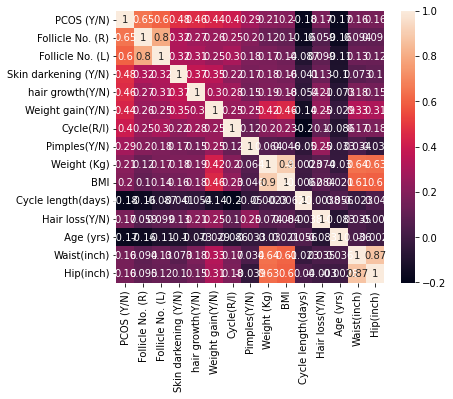

In [ ]:
plt.figure(figsize=(6,5))
sn.heatmap(df.corr(), annot=True)
plt.show()

## STEP2: DATA preparation for modelling

In [ ]:
y=df['PCOS (Y/N)']
X=df.drop(['PCOS (Y/N)'], axis=1)
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

# STEP 3: Train Model
# Model-1 KNN more interpretible less complex

In [ ]:
knn = KNeighborsClassifier(algorithm="auto")

k_range = list(range(1, 21))

param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(estimator=knn, param_grid = param_grid, cv=10, scoring = "accuracy", return_train_score=False,verbose=1)
print(grid)

grid_fit = grid.fit(X_train, y_train)

print("Optimum value of n-neighbour: ", grid.best_params_)

scores_train=grid.cv_results_['mean_test_score']

print(scores_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy', verbose=1)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Optimum value of n-neighbour:  {'n_neighbors': 9}
[0.77256098 0.79481707 0.82457317 0.8220122  0.83682927 0.83439024
 0.84158537 0.84164634 0.84414634 0.83914634 0.84158537 0.83664634
 0.84158537 0.83414634 0.84164634 0.83670732 0.83914634 0.83670732
 0.84408537 0.83664634]


## fitting the knn model with optimize n-neighbour value

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#fitting the knn model with optimize n-neighbour value
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X, y)
#predicting test dataset
y_test_hat = knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )




Accuracy for our testing dataset with tuning is : 84.56%


# Cross-validation with KFOLD

In [ ]:
knn2 = KNeighborsClassifier(algorithm="auto")

pgrid_knn2 = {
     'n_neighbors': (1,21,1),
     'leaf_size': (20,40,1),
     'p': (1,2),
     'weights': ('uniform', 'distance'),
     'metric': ('minkowski', 'chebyshev'),}

N_TRIALS=21

scores = np.zeros(N_TRIALS)

for i in  range(N_TRIALS):
    inner_cv = KFold(n_splits = 10, shuffle=True, random_state = i)
    outer_cv = KFold(n_splits = 10, shuffle=True, random_state = i)
    clf = GridSearchCV(estimator = knn2,param_grid = pgrid_knn2, cv = inner_cv, n_jobs = -1)
    score = cross_val_score(clf, X_test, y=y_test, cv = outer_cv)
    scores[i] = score.mean()

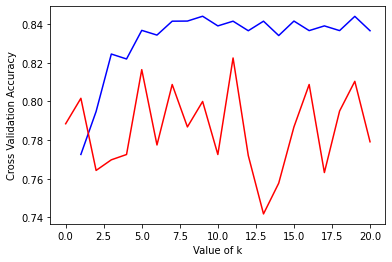

In [ ]:
plt.figure()
plt.plot(k_range,scores_train,color='b')
plt.plot(scores,color='r')
plt.xlabel('Value of k')
plt.ylabel('Cross Validation Accuracy')
plt.show()



# Confusion Matrix

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

[[87  7]
 [14 28]]


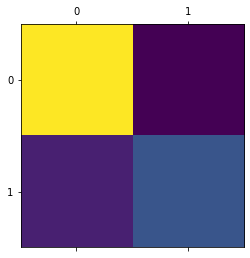

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89        94
         1.0       0.80      0.67      0.73        42

    accuracy                           0.85       136
   macro avg       0.83      0.80      0.81       136
weighted avg       0.84      0.85      0.84       136

Accuracy 0.8455882352941176


In [ ]:
confusion_matrix = confusion_matrix(y_test, y_test_hat)
print(confusion_matrix)

plt.matshow(confusion_matrix)
plt.show()


print(classification_report(y_test, y_test_hat))

print("Accuracy", metrics.accuracy_score(y_test, y_test_hat))



# MODEL 2: SVM

In [ ]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

In [ ]:
svc=SVC()
p_gridsvc = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_svc = GridSearchCV(svc, param_grid = p_gridsvc, refit=True,verbose=2,n_jobs=-1)
p_grid_fit = grid_svc.fit(X_train, y_train)
print("Optimum value of C and Gamma for SVC: ", grid_svc.best_params_)
scores_trainsvc = grid_svc.cv_results_['mean_test_score']
#print("SVC scores:",scores_trainsvc)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Optimum value of C and Gamma for SVC:  {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}


In [ ]:
#fitting model with optimum hyperparameters
svc2 = SVC(C=1.0, kernel='poly', gamma=0.001)
clf2 = svc2.fit(X_train,y_train)
ysvc_test_hat=clf2.predict(X_test) 
testsvc_accuracy=accuracy_score(y_test,ysvc_test_hat)*100
print("Accuracy of SVC for our testing dataset with tuning is : {:.2f}%".format(testsvc_accuracy))

Accuracy of SVC for our testing dataset with tuning is : 88.24%


In [ ]:
#cross validation of SVC model using inner and outer loops
p_gridsvm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svm = SVC()
N_TRIALS = 48
svm_scores = np.zeros(N_TRIALS)

for i in range(N_TRIALS):
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    clf_svm = GridSearchCV(estimator=svm, param_grid=p_gridsvm, cv=inner_cv, n_jobs=-1)
    svm_score = cross_val_score(clf_svm, X=Xval_val, y=yval_val, cv=outer_cv)
    svm_scores[i] = svm_score.mean()
print("Nested score: ",svm_scores)

Nested score:  [0.81360544 0.79693878 0.78809524 0.82142857 0.80926871 0.79251701
 0.78001701 0.81326531 0.78409864 0.78384354 0.78010204 0.80076531
 0.77159864 0.78435374 0.83418367 0.77176871 0.77619048 0.80493197
 0.81335034 0.80059524 0.76386054 0.78452381 0.79634354 0.78044218
 0.82984694 0.81360544 0.79294218 0.77610544 0.80493197 0.79651361
 0.75952381 0.80093537 0.80501701 0.80501701 0.80093537 0.77176871
 0.80068027 0.79260204 0.81743197 0.81743197 0.8130102  0.77644558
 0.79260204 0.82585034 0.76309524 0.76785714 0.79277211 0.78435374]


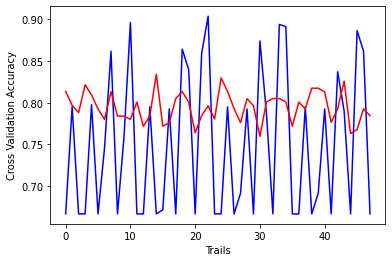

In [ ]:
plt.figure(2)
plt.plot(scores_trainsvc,color='b')
plt.plot(svm_scores,color='r')
plt.xlabel('Trails')
plt.ylabel('Cross Validation Accuracy')
plt.show()

In [ ]:
#COnfusion Matrix for MODEl2 SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)

Accuracy :  0.9044117647058824
Accuracy :  0.9044117647058824
[[91  3]
 [10 32]]


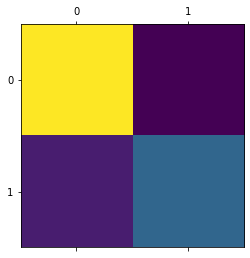

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93        94
         1.0       0.91      0.76      0.83        42

    accuracy                           0.90       136
   macro avg       0.91      0.86      0.88       136
weighted avg       0.91      0.90      0.90       136

Accuracy 0.9044117647058824


In [ ]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svc)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred_svc))


cm_svc = confusion_matrix(y_test, y_pred_svc)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred_svc))
print(cm_svc)

plt.matshow(cm_svc)
plt.show()

print(classification_report(y_test, y_pred_svc))

print("Accuracy", metrics.accuracy_score(y_test, y_pred_svc))

